###### Reed Whitcraft
Mod 02 Final Project

## Mod 02 Project

# Preface

    1. Observation
    2. Examine Research
    3. Form Hypothesis
    4. Conduct Experiment
    5. Analyze Experimental Results
    6. Draw Conclusions

# Setup & Configuration
***

### Import Dependencies

In [3]:
# import dependencies
import pandas as pd
import numpy as np
import scipy.stats as stats

# sql/database/orm libraries
import sqlalchemy
import sqlite3 as sql
from sqlalchemy import create_engine
from sqlalchemy.orm import Session, sessionmaker
from sqlalchemy import inspect

# interactive notebook library
from ipywidgets import interact, interactive

# plotting/visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Establish Database Connection & Preview Tables

In [4]:
# Open a connection to the sql server.
# using sqlite3 to initially get data into dataframes quickly
connect = sql.connect('Northwind_small.sqlite')
c = connect.cursor()
# Get table names
raw = c.execute("""select name from sqlite_master where type = 'table'""").fetchall()
tables = []
for table in raw:
    tables.append(table[0])

In [5]:
@interact

# query tables from above, and load them into a hash to view head/description/shape/etc
def table_preview(Table = tables, Preview = ['Head','Description', 'Shape','Unique','Types']):
    statement = "SELECT * FROM [" + Table + "]"
    print(statement)
    df = pd.read_sql_query(statement, connect)
    preview_return = {'Head':df.head(10), 'Description':df.describe(), 
                      'Shape':df.shape, 'Unique':df.nunique(axis = 0), 'Types':df.dtypes}
    out = preview_return[Preview]
    return out

interactive(children=(Dropdown(description='Table', options=('Employee', 'Category', 'Customer', 'Shipper', 'S…

In [6]:
# connecting to database
engine = create_engine("sqlite:///Northwind_small.sqlite", echo=True)
Session = sessionmaker(bind=engine)
session = Session()
inspector = inspect(engine)
print(inspector.get_table_names()) # print table names

2019-04-04 17:19:16,458 INFO sqlalchemy.engine.base.Engine SELECT CAST('test plain returns' AS VARCHAR(60)) AS anon_1
2019-04-04 17:19:16,458 INFO sqlalchemy.engine.base.Engine ()
2019-04-04 17:19:16,459 INFO sqlalchemy.engine.base.Engine SELECT CAST('test unicode returns' AS VARCHAR(60)) AS anon_1
2019-04-04 17:19:16,460 INFO sqlalchemy.engine.base.Engine ()
2019-04-04 17:19:16,462 INFO sqlalchemy.engine.base.Engine SELECT name FROM sqlite_master WHERE type='table' ORDER BY name
2019-04-04 17:19:16,462 INFO sqlalchemy.engine.base.Engine ()
['Category', 'Customer', 'CustomerCustomerDemo', 'CustomerDemographic', 'Employee', 'EmployeeTerritory', 'Order', 'OrderDetail', 'Product', 'Region', 'Shipper', 'Supplier', 'Territory']


In [7]:
# import sqalchemy, an ORM, and their query API for accessing database
from sqlalchemy import MetaData
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.sql import func

# initial setup to later map table names to objects & columns to attributes
metadata = MetaData()
metadata.reflect(engine)
Base = automap_base(metadata=metadata)
Base.prepare()

2019-04-04 17:19:16,615 INFO sqlalchemy.engine.base.Engine SELECT name FROM sqlite_master WHERE type='table' ORDER BY name
2019-04-04 17:19:16,616 INFO sqlalchemy.engine.base.Engine ()
2019-04-04 17:19:16,618 INFO sqlalchemy.engine.base.Engine PRAGMA table_info("Category")
2019-04-04 17:19:16,619 INFO sqlalchemy.engine.base.Engine ()
2019-04-04 17:19:16,620 INFO sqlalchemy.engine.base.Engine SELECT sql FROM  (SELECT * FROM sqlite_master UNION ALL   SELECT * FROM sqlite_temp_master) WHERE name = 'Category' AND type = 'table'
2019-04-04 17:19:16,621 INFO sqlalchemy.engine.base.Engine ()
2019-04-04 17:19:16,622 INFO sqlalchemy.engine.base.Engine PRAGMA foreign_key_list("Category")
2019-04-04 17:19:16,623 INFO sqlalchemy.engine.base.Engine ()
2019-04-04 17:19:16,624 INFO sqlalchemy.engine.base.Engine SELECT sql FROM  (SELECT * FROM sqlite_master UNION ALL   SELECT * FROM sqlite_temp_master) WHERE name = 'Category' AND type = 'table'
2019-04-04 17:19:16,624 INFO sqlalchemy.engine.base.Engin

2019-04-04 17:19:16,692 INFO sqlalchemy.engine.base.Engine PRAGMA foreign_key_list("EmployeeTerritory")
2019-04-04 17:19:16,693 INFO sqlalchemy.engine.base.Engine ()
2019-04-04 17:19:16,695 INFO sqlalchemy.engine.base.Engine SELECT sql FROM  (SELECT * FROM sqlite_master UNION ALL   SELECT * FROM sqlite_temp_master) WHERE name = 'EmployeeTerritory' AND type = 'table'
2019-04-04 17:19:16,696 INFO sqlalchemy.engine.base.Engine ()
2019-04-04 17:19:16,697 INFO sqlalchemy.engine.base.Engine PRAGMA index_list("EmployeeTerritory")
2019-04-04 17:19:16,698 INFO sqlalchemy.engine.base.Engine ()
2019-04-04 17:19:16,699 INFO sqlalchemy.engine.base.Engine PRAGMA index_list("EmployeeTerritory")
2019-04-04 17:19:16,700 INFO sqlalchemy.engine.base.Engine ()
2019-04-04 17:19:16,701 INFO sqlalchemy.engine.base.Engine PRAGMA index_info("sqlite_autoindex_EmployeeTerritory_1")
2019-04-04 17:19:16,701 INFO sqlalchemy.engine.base.Engine ()
2019-04-04 17:19:16,702 INFO sqlalchemy.engine.base.Engine SELECT sql 

2019-04-04 17:19:16,764 INFO sqlalchemy.engine.base.Engine PRAGMA table_info("Supplier")
2019-04-04 17:19:16,764 INFO sqlalchemy.engine.base.Engine ()
2019-04-04 17:19:16,766 INFO sqlalchemy.engine.base.Engine SELECT sql FROM  (SELECT * FROM sqlite_master UNION ALL   SELECT * FROM sqlite_temp_master) WHERE name = 'Supplier' AND type = 'table'
2019-04-04 17:19:16,766 INFO sqlalchemy.engine.base.Engine ()
2019-04-04 17:19:16,767 INFO sqlalchemy.engine.base.Engine PRAGMA foreign_key_list("Supplier")
2019-04-04 17:19:16,768 INFO sqlalchemy.engine.base.Engine ()
2019-04-04 17:19:16,769 INFO sqlalchemy.engine.base.Engine SELECT sql FROM  (SELECT * FROM sqlite_master UNION ALL   SELECT * FROM sqlite_temp_master) WHERE name = 'Supplier' AND type = 'table'
2019-04-04 17:19:16,769 INFO sqlalchemy.engine.base.Engine ()
2019-04-04 17:19:16,770 INFO sqlalchemy.engine.base.Engine PRAGMA index_list("Supplier")
2019-04-04 17:19:16,771 INFO sqlalchemy.engine.base.Engine ()
2019-04-04 17:19:16,772 INFO 

In [8]:
# Mapping to classes
Employee, Customer = Base.classes.Employee, Base.classes.Customer
Product, Category = Base.classes.Product, Base.classes.Category
Order, OrderDetail = Base.classes.Order, Base.classes.OrderDetail
Shipper, Supplier = Base.classes.Shipper, Base.classes.Supplier

### Helper Methods

In [9]:
# helper methods :)

def effect_size_blurb(effect_size):
    e_size = ""
    if effect_size <= 0.20:
        e_size = "small"
    elif effect_size >0.20 and effect_size <=0.50:
        e_size = "small/medium"
    elif effect_size > 0.50 and effect_size <=0.80:
        e_size = "medium/large"
    elif effect_size > 0.80 and effect_size <=1.20:
        e_size = "large/very large"
    else:
        e_size = "huge" 
        
    init = "Effect size is a measurement of the strength of a relationship between two variables on a numeric scale, and Cohen's d calculates this as the difference between two means divided by a standard deviation for the combined data. "
    init2 = "Generally, 0.01 is considered very small, 0.20 small, 0.50 medium, 0.80 large, 1.20 very large, and 2.0 huge. "
    init3 = "Typically, a lower Cohen's d score indicates the need for larger sample sizes. "
    init4 = "With a cohen's d value of " + str(round(effect_size, 3)) + ", we can say that the effect size is " + e_size
    
    return init + init2 + init3 + init4

# Hypothesis Tests
***

## Question 01: Do Discounts Increase The Overall Order Size?

Economically, there is a negative relationship between price and demand - as price goes up, demand falls, and as price goes down, demand rises.  For this case study, I will look to see if the presence of discounts (decrease in price) increases the overall order size (quantity demanded) by comparing the average total quantities ordered in two groups - (1) Orders that have at least one item discounted (Discounted), and (2) Orders that contain no discounted items (Undiscounted).

Formally,

#### Null Hypothesis

>**Ho:** Discounted Mean Quantity Ordered = Undiscounted Mean Quantity Ordered

#### Alternate Hypothesis

>**Ha:** Discounted Mean Quantity Ordered > Undiscounted Mean Quantity Ordered

First, we have to query our database - aggregating the OrderDetails (line items) for each Order, and separating discounted and undiscounted orders.

### Query database for orders with and without any discounted items

In [10]:
# query OrderDetail => grouped (aggregated) by Order (Orders have many OrderDetails)
# sum quantities across OrderDetail that belong to same Order
# find MaxDiscount that belong to same Order (to determine non-discounted orders, which will = 0)
subquery = session.query(OrderDetail, 
                         func.sum(OrderDetail.Quantity).label("TotalQuantity"), 
                         func.max(OrderDetail.Discount).label("MaxDiscount"), 
                         func.min(OrderDetail.Discount).label("MinDiscount")
                        ).group_by(OrderDetail.OrderId).subquery()

query = session.query(subquery).filter(subquery.c.MaxDiscount > 0).group_by(subquery.c.OrderId)
discounted_orders = pd.read_sql(query.statement, engine) # 380 total

# same as query above, *EXCEPT* filtering for MaxDiscount == 0
# this way, we have orders that have no items with discounts
subquery2 = session.query(OrderDetail, 
                         func.sum(OrderDetail.Quantity).label("TotalQuantity"), 
                         func.max(OrderDetail.Discount).label("MaxDiscount"), 
                         func.min(OrderDetail.Discount).label("MinDiscount")
                        ).group_by(OrderDetail.OrderId).subquery()

query2 = session.query(subquery2).filter(subquery2.c.MaxDiscount == 0).group_by(subquery2.c.OrderId)
undiscounted_orders = pd.read_sql(query2.statement, engine) # 450 total

2019-04-04 17:19:17,631 INFO sqlalchemy.engine.base.Engine SELECT anon_1."Id", anon_1."OrderId", anon_1."ProductId", anon_1."UnitPrice", anon_1."Quantity", anon_1."Discount", anon_1."TotalQuantity", anon_1."MaxDiscount", anon_1."MinDiscount" 
FROM (SELECT "OrderDetail"."Id" AS "Id", "OrderDetail"."OrderId" AS "OrderId", "OrderDetail"."ProductId" AS "ProductId", "OrderDetail"."UnitPrice" AS "UnitPrice", "OrderDetail"."Quantity" AS "Quantity", "OrderDetail"."Discount" AS "Discount", sum("OrderDetail"."Quantity") AS "TotalQuantity", max("OrderDetail"."Discount") AS "MaxDiscount", min("OrderDetail"."Discount") AS "MinDiscount" 
FROM "OrderDetail" GROUP BY "OrderDetail"."OrderId") AS anon_1 
WHERE anon_1."MaxDiscount" > ? GROUP BY anon_1."OrderId"
2019-04-04 17:19:17,632 INFO sqlalchemy.engine.base.Engine (0,)
2019-04-04 17:19:17,649 INFO sqlalchemy.engine.base.Engine SELECT anon_1."Id", anon_1."OrderId", anon_1."ProductId", anon_1."UnitPrice", anon_1."Quantity", anon_1."Discount", anon_1."

/anaconda3/lib/python3.7/site-packages/sqlalchemy/sql/sqltypes.py:603: SAWarning: Dialect sqlite+pysqlite does *not* support Decimal objects natively, and SQLAlchemy must convert from floating point - rounding errors and other issues may occur. Please consider storing Decimal numbers as strings or integers on this platform for lossless storage.
  'storage.' % (dialect.name, dialect.driver))


### Normality and Variance Checks of Both Samples

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


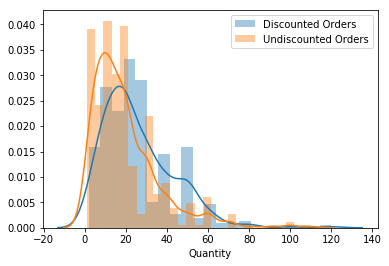

In [11]:
# Take a look at the distributions of these orders' quantities
sns.distplot(discounted_orders.Quantity, label="Discounted Orders")
sns.distplot(undiscounted_orders.Quantity, label="Undiscounted Orders")
plt.legend()

#### Confirming Non-Normality of Distributions

Here, we'll use the Shapiro-Wilk normality test, which tests if a random sample comes from a normal distribution.

>Ho: Sample data is normally distributed

>Ha: Sample data is not normally distributed

Here, if we get a p-value less than 0.05, we have to reject our null hypothesis that the data is normally distributed, and accept that the data is not from a normal distribution.  Ideally, we want the null hypothesis to not be rejected (but, correctly!), but that rarely happens with real data and large samples.  If the null hypothesis is rejectable, then we'll have to consider repeated sampling, normalization (log), or accepting the distribution given that our sample sizes are large enough.

In [12]:
shapiro_discounted = stats.shapiro(discounted_orders.Quantity)
shapiro_undiscounted = stats.shapiro(undiscounted_orders.Quantity)

# p-value for discounted orders distribution test
print("p-value for discounted orders: ", shapiro_discounted[1]) 

# p-value for undiscounted orders distribution test
print("p-value for undiscounted orders: ", shapiro_undiscounted[1])

print('t-stat for discounted orders: ', shapiro_discounted[0])
print('t-stat for undiscounted orders: ', shapiro_undiscounted[0])
# p-value (discounted) => reject null hypothesis => not normally distributed sample
# p-value (undiscounted) => reject null hypothesis => not normally distributed sample

p-value for discounted orders:  1.4756438800923866e-14
p-value for undiscounted orders:  2.308488827657349e-21
t-stat for discounted orders:  0.9065327048301697
t-stat for undiscounted orders:  0.8325416445732117


#### Variance Check of Both Samples

Now, we have to check if the variances of these samples are the same, and we will do this by applying the Levene test through scipy's **stats.levene()** method. 

> Ho: Sample variances are the same (and come from populations with equal variances)

> Ha: Sample variances are not the same

Ideally, again, we want the null hypothesis to not be rejected.

In [13]:
stats.levene(discounted_orders.Quantity, undiscounted_orders.Quantity)
# p-value of 0.0962, above our threshold of 0.05, so *accept* null hypothesis that variances are similar
# and conclude that the sample variances are not from populations with equal variances

LeveneResult(statistic=2.7726510597324077, pvalue=0.0962655288672859)

### T-Test Both Samples & Analysis

In [14]:
# helper method to measure effect size
# represents the magnitude of differences between two groups on a given variable
# with larger values representing a greater differentation between two groups on that variable

def pooled_var(group1, group2, col_name):
    n1, n2 = len(group1), len(group2)
    var1 = group1[col_name].var()
    var2 = group2[col_name].var()
    
    pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
    
    return pooled_var

# for calculating effect size
def cohens_d(group1, group2, col_name):
    diff = group1[col_name].mean() - group2[col_name].mean()
    
    # calculate pooled threshold
    pooled_v = pooled_var(group1, group2, col_name)
    
    # calculate cohen's d statistic
    d = diff / np.sqrt(pooled_v)
    
    return d

In [15]:
from statsmodels.stats.weightstats import ttest_ind
# import scipy.stats

tstat, pvalue, df = ttest_ind(discounted_orders.Quantity, undiscounted_orders.Quantity, alternative='larger')

# calculate pooled variance
pooled_v = pooled_var(undiscounted_orders, discounted_orders, "Quantity")
# calculate effect size using cohen's d
cohen_d = cohens_d(undiscounted_orders, discounted_orders, "Quantity")

print('p-value = {0:1.3e}'.format(pvalue))
print('t-stat = {0:1.3f}'.format(tstat))
print('cohen d = {0:1.3f}'.format(cohen_d))

e = effect_size_blurb(cohen_d)

p-value = 1.028e-07
t-stat = 5.238
cohen d = -0.365


Given the p-value of {{pvalue}}, which is < our set significance level of 0.05, and the t-statistic of {{tstat}}, we can confidently reject the null hypothesis in favor of our alternative hypothesis.  That is, we can say that the average quantity order of discounted orders and undiscounted orders are not the same, and discounted orders have a higher average quantity of items.  

{{e}}


## Question 01B: Do Discount Rates Have Different Effects On Demand? Are Higher Discounts More Effective In Increasing Quantity Demanded Than Lower Discounts?

Same scenario as before - a decrease in price, typically, results in an increase in demand.  In theory, a greater decrease in price should result in a greater increase in quantity demanded. Let's take a look at the types of discounts that have been offered.

### Query Database

#### Inspect Discount Rates and Frequency

In [16]:
# query OrderDetail table for Discount & count the appearances of Discount
subquery = session.query(OrderDetail.Discount,
                      func.count(OrderDetail.Discount).label("DiscountCount")
                     ).group_by(OrderDetail.Discount).subquery()

query = session.query(subquery
                     ).order_by(subquery.c.DiscountCount.desc())

discount_counts = pd.read_sql(query.statement, engine)
print("Total Number of OrderDetails:", discount_counts.DiscountCount.sum())
discount_counts.head(11)

2019-04-04 17:19:22,421 INFO sqlalchemy.engine.base.Engine SELECT anon_1."Discount", anon_1."DiscountCount" 
FROM (SELECT "OrderDetail"."Discount" AS "Discount", count("OrderDetail"."Discount") AS "DiscountCount" 
FROM "OrderDetail" GROUP BY "OrderDetail"."Discount") AS anon_1 ORDER BY anon_1."DiscountCount" DESC
2019-04-04 17:19:22,422 INFO sqlalchemy.engine.base.Engine ()
Total Number of OrderDetails: 2155


Discount  DiscountCount
0       0.00           1317
1       0.05            185
2       0.10            173
3       0.20            161
4       0.15            157
5       0.25            154
6       0.03              3
7       0.02              2
8       0.01              1
9       0.04              1
10      0.06              1

<table>
    <thead>
        <tr>
            <th colspan="3" style="text-align: center">Out of the 2,155 OrderDetails</th>
        </tr>
        <tr>
            <th># Of OrderDetails</th>
            <th>Discount</th>
            <th>% Of All OrderDetails</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td style="text-align: center">1,317</td>
            <td style="text-align: center">0%</td>
            <td style="text-align: center">61.1%</td>
        </tr>
        <tr>
            <td style="text-align: center">185</td>
            <td style="text-align: center">5%</td>
            <td style="text-align: center">8.5%</td>
        </tr>
        <tr>
            <td style="text-align: center">173</td>
            <td style="text-align: center">10%</td>
            <td style="text-align: center">8.0%</td>
        </tr>
        <tr>
            <td style="text-align: center">161</td>
            <td style="text-align: center">20%</td>
            <td style="text-align: center">7.5%</td>
        </tr>
        <tr>
            <td style="text-align: center">157</td>
            <td style="text-align: center">15%</td>
            <td style="text-align: center">7.3%</td>
        </tr>
        <tr>
            <td style="text-align: center">154</td>
            <td style="text-align: center">25%</td>
            <td style="text-align: center">7.1%</td>
        </tr>
    </tbody>
</table>

#### Query Function To Get Orders By Discount

Now that we know what kind of discount rates have been offered and their frequency, we have a better idea of what we want to query.  Here, we'll write a function that takes a discount rate as its input, queries the OrderDetail table, and aggregates quantities ordered for the given discount rate per order:

In [17]:
# takes Discount (fraction) as input and returns TotalQuantity
# from OrderDetails that have the chosen Discount
def query_orders_by_discount(discount):
    query = session.query(OrderDetail.OrderId, 
                            func.sum(OrderDetail.Quantity).label("TotalQuantity")
                            ).filter(OrderDetail.Discount == discount).group_by(OrderDetail.OrderId)
    orders = pd.read_sql(query.statement, engine)
    return orders

In [18]:
discount_0 = query_orders_by_discount(0) # full-price
discount_5 = query_orders_by_discount(0.05)
discount_10 = query_orders_by_discount(0.10)
discount_15 = query_orders_by_discount(0.15)
discount_20 = query_orders_by_discount(0.20)
discount_25 = query_orders_by_discount(0.25)

2019-04-04 17:19:23,776 INFO sqlalchemy.engine.base.Engine SELECT "OrderDetail"."OrderId", sum("OrderDetail"."Quantity") AS "TotalQuantity" 
FROM "OrderDetail" 
WHERE "OrderDetail"."Discount" = ? GROUP BY "OrderDetail"."OrderId"
2019-04-04 17:19:23,776 INFO sqlalchemy.engine.base.Engine (0,)
2019-04-04 17:19:23,781 INFO sqlalchemy.engine.base.Engine SELECT "OrderDetail"."OrderId", sum("OrderDetail"."Quantity") AS "TotalQuantity" 
FROM "OrderDetail" 
WHERE "OrderDetail"."Discount" = ? GROUP BY "OrderDetail"."OrderId"
2019-04-04 17:19:23,782 INFO sqlalchemy.engine.base.Engine (0.05,)
2019-04-04 17:19:23,786 INFO sqlalchemy.engine.base.Engine SELECT "OrderDetail"."OrderId", sum("OrderDetail"."Quantity") AS "TotalQuantity" 
FROM "OrderDetail" 
WHERE "OrderDetail"."Discount" = ? GROUP BY "OrderDetail"."OrderId"
2019-04-04 17:19:23,787 INFO sqlalchemy.engine.base.Engine (0.1,)
2019-04-04 17:19:23,790 INFO sqlalchemy.engine.base.Engine SELECT "OrderDetail"."OrderId", sum("OrderDetail"."Quanti

In [19]:
# interactive to preview what the queries returned.
preview_select = ["0%", "5%", "10%", "15%", "20%", "25%"]
preview_hash = {"0%": discount_0, "5%": discount_5, "10%": discount_10, "15%": discount_15, "20%": discount_20, "25%": discount_25}
@interact
def table_preview(Table = preview_select, Preview = ['Head','Description']):
    df = preview_hash[Table]
    preview_return = {'Head':df.head(10), 'Description':df.describe()}
    out = preview_return[Preview]
    return out

interactive(children=(Dropdown(description='Table', options=('0%', '5%', '10%', '15%', '20%', '25%'), value='0…

### Normality & Variance Checks

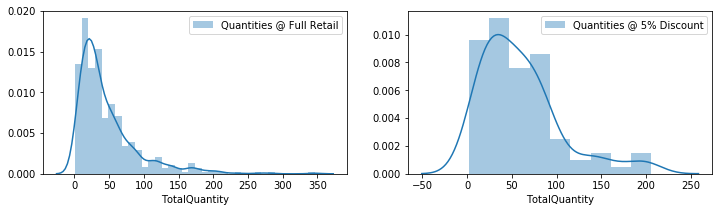

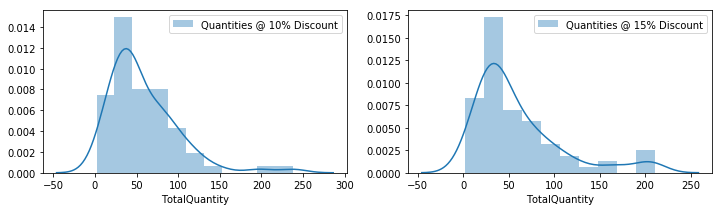

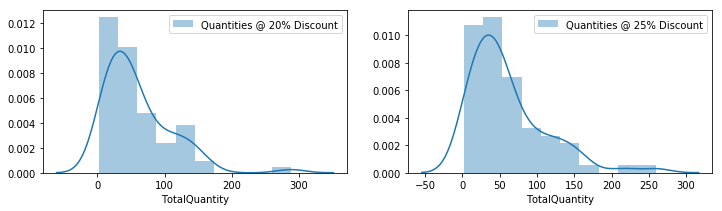

In [51]:
# Take a look at the distributions of quantities ordered at given discount rates
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,3))
p = sns.distplot(discount_0.TotalQuantity, label="Quantities @ Full Retail", ax=ax1)
p.legend()
p = sns.distplot(discount_5.TotalQuantity, label="Quantities @ 5% Discount", ax=ax2)
p.legend()

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,3))
p = sns.distplot(discount_10.TotalQuantity, label="Quantities @ 10% Discount", ax=ax1)
p.legend()
p = sns.distplot(discount_15.TotalQuantity, label="Quantities @ 15% Discount", ax=ax2)
p.legend()

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,3))
p = sns.distplot(discount_20.TotalQuantity, label="Quantities @ 20% Discount", ax=ax1)
p.legend()
p = sns.distplot(discount_25.TotalQuantity, label="Quantities @ 25% Discount", ax=ax2)
p.legend()

#### Confirming Non-Normality of Distributions

Here, we'll use the Shapiro-Wilk normality test, which tests if a random sample comes from a normal distribution.

>Ho: Sample data is normally distributed

>Ha: Sample data is not normally distributed

In [52]:
discounts_list = [discount_0, discount_5, discount_10, discount_15, discount_20, discount_25]
for discount in discounts_list:
    shapiro_stat = stats.shapiro(discount)
    print("p-value for normality: ", shapiro_stat[1])
    print("t-stat for normality: ", shapiro_stat[0])
    print("*_*_*_*_*")

p-value for normality:  5.044674471569341e-44
t-stat for normality:  0.6599211692810059
*_*_*_*_*
p-value for normality:  1.6800632777017265e-18
t-stat for normality:  0.659333348274231
*_*_*_*_*
p-value for normality:  3.6745625975761434e-17
t-stat for normality:  0.6594877243041992
*_*_*_*_*
p-value for normality:  3.798118234800944e-17
t-stat for normality:  0.6600745916366577
*_*_*_*_*
p-value for normality:  6.551650292757264e-17
t-stat for normality:  0.6601555943489075
*_*_*_*_*
p-value for normality:  8.058693297745585e-17
t-stat for normality:  0.6589568853378296
*_*_*_*_*


Very low p-values across the board for all ranges of discounts, so we have to reject our null hypothesis that these samples are normally distributed.

### T-Test Both Samples & Analysis

With non-normally distributed samples, we are going to use the Welch's t-test again, assuming unequal variances between the discount samples

In [53]:
@interact
# creates a dropdown to compare discount rates via Welch's t-test
# Given that we have set the "alternative"="larger" as a parameter to ttest_ind()
# this means Discount1 = "Greater Discount % 
# AKA The mean that the Alternative Hypothesis says is higher
# Discount2 = Lower Discount or Undiscounted Orders
def table_preview(Discount1 = ['25%', '20%', '15%', '10%', '5%', '0%'], Discount2 = ['5%','10%','15%', '20%', '25%', '0%']):
    
    discount_dict = {
        '0%': discount_0,
        '5%': discount_5, 
        '10%':discount_10, 
        '15%':discount_15, 
        '20%': discount_20, 
        '25%': discount_25
    }
    selected_discount_1 = discount_dict[Discount1] # defaults to first in list
    selected_discount_2 = discount_dict[Discount2] # defaults to first in list
    
    tstat, pvalue, df = ttest_ind(selected_discount_1.TotalQuantity, selected_discount_2.TotalQuantity, usevar='unequal', alternative='larger')
    
    # calculate pooled variance
    pooled_v = pooled_var(selected_discount_1, selected_discount_2, "TotalQuantity")
    
    # calculate effect size using cohen's d
    cohen_d = cohens_d(selected_discount_1, selected_discount_2, "TotalQuantity")
    
    print("Comparing {} Discount vs. {} Discount, we get the following:".format(Discount1, Discount2))
    print('p-value = {0:1.3e} \n hey'.format(pvalue))
    print('t-stat = {0:1.3f}'.format(tstat))
    print('cohen d = {0:1.3f}'.format(cohen_d))

interactive(children=(Dropdown(description='Discount1', options=('25%', '20%', '15%', '10%', '5%', '0%'), valu…

<table>
    <thead>
        <tr>
            <th>Comparison</th>
            <th>P-Value</th>
            <th>T-Stat</th>
            <th>Cohen's d</th>
            <th>Accept/Reject Null</th>
            <th>Effect Size</th>
            <th>Conclusion</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>25% vs. Full Retail</td>
            <td>5.348e-02</td>
            <td>1.630</td>
            <td>0.228</td>
            <td>Accept Null</td>
            <td>Small</td>
            <td>P value close to 0.05, but above; low t-stat</td>
        </tr>
        <tr>
            <td>20% vs. Full Retail</td>
            <td>1.239e-02</td>
            <td>2.283</td>
            <td>0.285</td>
            <td>Reject Null</td>
            <td>Small</td>
            <td>P value below 0.05; high t-stat</td>
        </tr>
        <tr>
            <td>15% vs. Full Retail</td>
            <td>3.923e-03 </td>
            <td>2.716</td>
            <td>0.320</td>
            <td>Reject Null</td>
            <td>Small/Med</td>
            <td>P value well below 0.05; high t-stat</td>
        </tr>
        <tr>
            <td>10% vs. Full Retail</td>
            <td>2.017e-04</td>
            <td>3.659</td>
            <td>0.388</td>
            <td>Reject Null</td>
            <td>Small/Med</td>
            <td>P value well below 0.05; very high t-stat</td>
        </tr>
        <tr>
            <td>5% vs. Full Retail</td>
            <td>1.898e-03</td>
            <td>2.956</td>
            <td>0.331</td>
            <td>Reject Null</td>
            <td>Small</td>
            <td>P value well beloe 0.05; bery high t-stat</td>
        </tr>
        <tr>
            <td colspan="7" style='text-align: center'>Comparison of Discounts vs. 5% Discount</td>
        </tr>
        <tr>
            <td>25% vs. 5%</td>
            <td>7.159e-01</td>
            <td>-0.572</td>
            <td>-0.093</td>
            <td>Accept Null</td>
            <td>Very Small</td>
            <td>High P value; low t-stat</td>
        </tr>
        <tr>
            <td>20% vs. 5%</td>
            <td>6.131e-01 </td>
            <td>-0.288</td>
            <td>-0.046</td>
            <td>Accept Null</td>
            <td>Very Small</td>
            <td>High P value; very low t-stat</td>
        </tr>
        <tr>
            <td>15% vs. 5%</td>
            <td>5.310e-01 </td>
            <td>-0.078</td>
            <td>-0.012</td>
            <td>Accept Null</td>
            <td>Very Small</td>
            <td>High P value; very low t-stat</td>
        </tr>
        <tr>
            <td>10% vs. 5%</td>
            <td>3.599e-01 </td>
            <td>0.359</td>
            <td>0.056</td>
            <td>Accept Null</td>
            <td>Very Small</td>
            <td>High P value; very low t-stat</td>
        </tr>
    </tbody>
</table>

Looking at the above table, we can conclude that quantities ordered with discounts of 20%, 15%, 10%, and 5% are greater than the quantities ordered at full retail price.  Additionally, we can see that at discount rates of 15%, 10%, and 5%, we have the lowest p-values and highest t-stats.  Discount rates of 15% and 10% have a small-medium effect size while the other discount rates have smaller effect sizes.  

This isn't surprising - at all discount rates (excluding 25%), we see an increase in total quantities ordered compared to full-retail-priced orders.  

My initial takeaway is that, potentially, the higher discount rates at 25% and 20% are an indication of product liquidation.  That is, given that we are dealing with food products, with a discount that high, it could be the case that the company was trying to get rid of extra inventory (or products that are expiring soon and will have 0 value if not sold).

Additionally, with the success of 10% and 5% discount rates (and with the lowest p-values, and highest t-stats), I caution that these products may be more popular (demanded), so, when discounted, demand increases across the board. It could also be the case that these products sold at a 10% and 5% discount have a higher price elasticity of demand (small change in price results in bigger increase in demand) than the products that had higher discount rates, which could be more inelastic (changes in price have a relatively small effect on the quantity of the good demanded).

Going forward, I would consider looking at products that have been sold at different discount rates, and see how the quantity demanded for these change under different discount nrates.